# TODO
## HMM derivation
### EM
### Forward-backward
### Viterbi

In [13]:
%reload_ext autoreload
%autoreload 2

from datasets.em_gaussian import EMGaussianDataset
from src.utils.plot import plot_clusters, plot_ellipses
from src.hidden_markov_model import HiddenMarkovModel
import matplotlib.pyplot as plt
import torch

In [14]:
dataset = EMGaussianDataset("../datasets/data/EMGaussian")
x = dataset[0]

train time : 11.27 ms
train time : 25.99 ms
train time : 510.70 ms
hmm.transition_matrix
 tensor([[0.0158, 0.0068, 0.9379, 0.1347],
        [0.0631, 0.8949, 0.0356, 0.0307],
        [0.8188, 0.0586, 0.0254, 0.0208],
        [0.1017, 0.0318, 0.0086, 0.8079]], dtype=torch.float64)
hmm.pi
 tensor([4.1974e-26, 1.0000e+00, 1.3827e-92, 4.4087e-20], dtype=torch.float64)
hmm.emission_distribution.means
 tensor([[-1.9572,  4.1904],
        [-2.9592, -3.4365],
        [ 4.0153,  4.1299],
        [ 3.7885, -3.6899]], dtype=torch.float64)
hmm.emission_distribution.covariances
 tensor([[[ 3.2484,  0.2798],
         [ 0.2798,  2.8179]],

        [[ 6.8586,  6.6331],
         [ 6.6331,  6.7321]],

        [[ 0.1779,  0.1931],
         [ 0.1931, 10.6192]],

        [[ 0.8762,  0.0220],
         [ 0.0220,  2.2082]]], dtype=torch.float64)


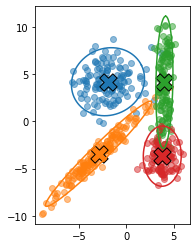

In [15]:
hmm = HiddenMarkovModel(4)
hmm.train(x)
print("hmm.transition_matrix\n", torch.exp(hmm.transition_matrix_log))
print("hmm.pi\n", torch.exp(hmm.pi_log))
print("hmm.emission_distribution.means\n", hmm.emission_distribution.means)
print("hmm.emission_distribution.covariances\n", hmm.emission_distribution.covariances)

plot_ellipses(hmm.emission_distribution)
hmm.emission_distribution.predict = lambda _: hmm.viterbi(x)
plot_clusters(hmm.emission_distribution, x)
plt.show()

